In [61]:
from statsmodels.tsa.stattools import acf, pacf

In [62]:
import statsmodels.tsa.stattools as ts

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime

In [65]:
data = pd.read_csv('ge.us.txt', sep=",", header=0)
data.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"]



In [76]:
dates = []
prices = []

In [77]:
data_dates = data.loc[:,"Date"]
data_open = data.loc[:, "Open"]

In [78]:
for date in data_dates:
#     dates.append([int(date.split('-')[2])])
    interval = datetime.datetime(int(date.split('-')[0]),int(date.split('-')[1]),int(date.split('-')[2])) - datetime.datetime(1962,1,2)
    dates.append([int(interval.days+1)])

for open_price in data_open:
    prices.append(float(open_price)*10)
    

In [79]:
print(prices)

[6.277, 6.201, 6.201, 6.122, 5.957, 5.957, 5.957, 5.957, 5.957, 5.957, 5.957, 6.037, 5.878, 5.957, 6.037, 6.037, 5.878, 6.037, 5.957, 5.957, 6.037, 6.037, 6.277, 6.201, 6.201, 6.122, 6.201, 6.277, 6.277, 6.277, 6.277, 6.362, 6.362, 6.442, 6.442, 6.362, 6.362, 6.362, 6.277, 6.201, 6.277, 6.277, 6.362, 6.362, 6.362, 6.277, 6.362, 6.442, 6.5200000000000005, 6.5200000000000005, 6.5200000000000005, 6.442, 6.5200000000000005, 6.5200000000000005, 6.442, 6.442, 6.442, 6.442, 6.5200000000000005, 6.362, 6.442, 6.5200000000000005, 6.442, 6.362, 6.362, 6.277, 6.277, 6.362, 6.362, 6.277, 6.201, 6.122, 6.122, 6.201, 6.201, 6.201, 6.201, 6.201, 6.122, 6.122, 6.037, 6.037, 5.878, 5.716, 5.878, 5.957, 5.957, 5.957, 5.878, 5.878, 5.878, 5.878, 5.798, 5.878, 5.878, 5.878, 5.957, 5.957, 5.957, 5.716, 5.634, 5.634, 5.476, 5.233, 5.476, 5.476, 5.476, 5.233, 5.313, 5.393, 5.393, 5.393, 5.313, 5.154, 5.074, 5.074, 5.233, 5.154, 5.074, 4.989199999999999, 4.831899999999999, 4.590199999999999, 4.669, 4.590199999

In [80]:
Inprice = np.log(prices)

In [81]:
len(prices)

14058

In [82]:
Inprice

array([1.83689216, 1.82471057, 1.82471057, ..., 5.30876262, 5.30031537,
       5.29731687])

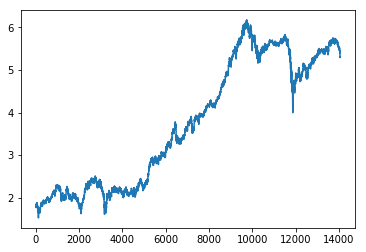

In [83]:
plt.plot(Inprice)
plt.show()

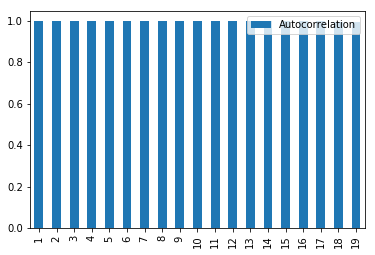

In [85]:
acf_1 = acf(Inprice)[1:20]
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

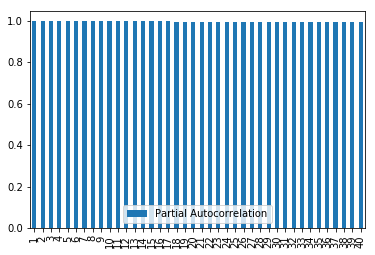

In [42]:
pacf_1 = acf(Inprice)[1:2000]
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

In [38]:
result = ts.adfuller(Inprice, 1)
result

(-0.8669560124344277,
 0.7986594649300381,
 1,
 14056,
 {'1%': -3.4308153169198317,
  '5%': -2.861745648934714,
  '10%': -2.566879462140259},
 -75468.9675895529)

In [88]:
Inprice_diff = Inprice - Inprice.shift()
diff = Inprice_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First different autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'shift'